Importing the libraries and tools

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Acquiring a suitable dataset presents one of the most crucial components of any data-science endeavor. We will be downloading our dataset from Kaggle. There are two datasets one for fake news and one for true news. In true news, there are 21417 news items, and in fake news, there are 23481 news items. Both datasets have a label column in which 1 stands for fake news and 0 stands for true news. We will be combining both these datasets using pandas built-in function.


In [2]:
True_news = pd.read_csv("True.csv")
Fake_news = pd.read_csv("Fake.csv")

In [3]:
True_news['label'] = 0

In [4]:
Fake_news['label'] = 1

In [5]:
True_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
Fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
dataset1 = True_news[['text','label']]
dataset2 = Fake_news[['text','label']]

In [8]:
dataset = pd.concat([dataset1 , dataset2])

In [9]:
dataset.shape

(44898, 2)

Null values

In [10]:
dataset.isnull().sum() # no null values

text     0
label    0
dtype: int64

Balanced or Unbalanced dataset

In [11]:
dataset['label'].value_counts()

1    23481
0    21417
Name: label, dtype: int64

In [12]:
dataset1.shape # true news

(21417, 2)

In [13]:
dataset2.shape # fake news

(23481, 2)

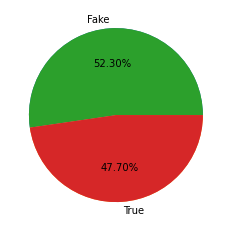

In [14]:
import matplotlib.pyplot as plt
import numpy as np

y = (23481,21417)
labels = ['Fake','True']

plt.pie(y)
plt.pie(y,labels=labels,autopct = '%0.2f%%')
plt.show() 



#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A PIE CHART

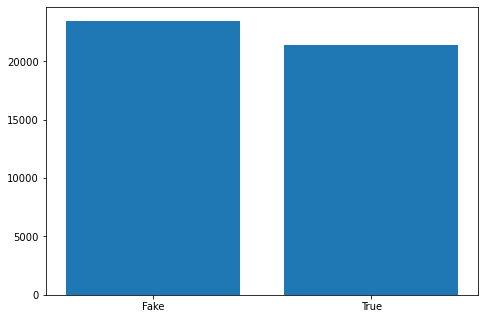

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['Fake','True']
ax.bar(title,y)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

Shuffle or Resample

In [16]:
dataset = dataset.sample(frac = 1)

In [17]:
dataset.head(40)

,text,label
798,WASHINGTON (Reuters) - A U.S. district judge a...,0
17245,"When it comes to limiting our free speech, not...",1
5310,History has been made (once again) in the Unit...,1
188,You might never suspect that up here in beauti...,1
12009,Remember when Pelosi said it s AFFORDABLE :,1
225,After weeks of blubbering on Twitter and into ...,1
1656,It seems that Donald Trump is often incapable ...,1
15454,GENEVA (Reuters) - The International Committee...,0
2178,TORONTO (Reuters) - Neo-Nazi website the Daily...,0
1889,WASHINGTON (Reuters) - The U.S. House of Repre...,0


In [18]:
import nltk

In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [20]:
ps = WordNetLemmatizer()

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stopwords = stopwords.words('english')

In [23]:
# printing the stopwords in English

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using RegX
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatize the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleanned_news = ' '.join(news) 
    
    # return cleanned data
    return cleanned_news 

Lemmatization: Convert the word or token in its Base form.
Stop words: words that occur too frequently and are not considered informative

In [26]:
dataset['text'] = dataset['text'].apply(lambda x : cleaning_data(x))

In [27]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2))

In [30]:
vectorizer

TfidfVectorizer(lowercase=False, max_features=50000, ngram_range=(1, 2))

In [31]:
dataset.shape


(44898, 2)

In [32]:
X = dataset.iloc[:35000,0]
y = dataset.iloc[:35000,1]

In [33]:
X.head()

798      washington reuters u district judge declined e...
17245    come limiting free speech nothing lawless gove...
5310     history made united state hillary rodham clint...
188      might never suspect beautiful washington state...
12009                      remember pelosi said affordable
Name: text, dtype: object

In [34]:
y.head()

798      0
17245    1
5310     1
188      1
12009    1
Name: label, dtype: int64

The dataset must be split into two distinct sets. 80% of the data will be used to train our model and the rest 20% will serve as testing data. We train our model on the trainset and test our data on the testing set.

In [35]:
from sklearn.model_selection import train_test_split
train_data , test_data , train_label , test_label = train_test_split(X , y , test_size = 0.2 ,random_state = 0)

Fit this vectorizer on our training dataset and transform its values on the training and testing dataset with respect to the vectorizer.


After vectorizing the data it will return the sparse matrix which has to be converted into arrays for the ML algorithm.We will be using the toarray function to achieve this

In [36]:
vec_train_data = vectorizer.fit_transform(train_data)

In [37]:
vec_train_data = vec_train_data.toarray()

In [38]:
train_data.shape , test_data.shape

((28000,), (7000,))

In [39]:
vec_test_data = vectorizer.transform(test_data).toarray()

In [40]:
vec_train_data.shape , vec_test_data.shape

((28000, 50000), (7000, 50000))

In [41]:
train_label.value_counts() # balanced partition

1    14675
0    13325
Name: label, dtype: int64

In [42]:
test_label.value_counts() # balanced partition

1    3637
0    3363
Name: label, dtype: int64

In [43]:
training_data = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names())
testing_data = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names())

First we have to fit the classifier on our vectorized train data then when the classifier has fitted successfully on the training set then we can use the predict method to predict the result on the test set.

In [44]:
#IMPPORTING MNB

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
from sklearn.metrics import accuracy_score,classification_report

In [47]:
clf = MultinomialNB()

In [48]:
clf.fit(training_data, train_label)
y_pred  = clf.predict(testing_data)

In [49]:
pd.Series(y_pred).value_counts()

1    3686
0    3314
dtype: int64

In [50]:
test_label.value_counts()

1    3637
0    3363
Name: label, dtype: int64

In [51]:
#implemented the model,onto accuracy checks etc

Now predict on both train set

In [52]:
print(classification_report(test_label , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3363
           1       0.95      0.96      0.95      3637

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



In [53]:
y_pred_train = clf.predict(training_data)
print(classification_report(train_label , y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13325
           1       0.96      0.96      0.96     14675

    accuracy                           0.96     28000
   macro avg       0.96      0.96      0.96     28000
weighted avg       0.96      0.96      0.96     28000



In [54]:
accuracy_score(train_label , y_pred_train)

0.9586785714285714

In [55]:
accuracy_score(test_label , y_pred)

0.9504285714285714

In [56]:
mnb_acc = accuracy_score(test_label , y_pred)

In [57]:
mnb_acc

0.9504285714285714

As We can see above we have a very good score of precision, recall and f1 score. Our model has performed very well on unseen data. The accuracy score on test dataset is 95% which is great. Our accuracy on the training set is almost 96% which is also very good. Our model has performed well.

In [58]:
#predict if news is fake by providing str test string input

In [59]:
news = cleaning_data(str("Imposters posing as army personnel on the social media have been called out by the Indian Army as false news and disinformation."))

In [60]:
single_prediction = clf.predict(vectorizer.transform([news]).toarray())
single_prediction

array([1], dtype=int64)

In [61]:
acc_train=accuracy_score(train_label , y_pred_train) #accuracy of trained data

In [62]:
acc_test=accuracy_score(test_label , y_pred) #accuracy of test data

In [63]:
print(acc_test,acc_train) #printing the accuracy values

0.9504285714285714 0.9586785714285714


In [64]:
print(f'Accuracy of training data: {round(acc_train*100,2)}%')
print(f'Accuracy of testing data: {round(acc_test*100,2)}%')

Accuracy of training data: 95.87%
Accuracy of testing data: 95.04%


In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
confusion_matrix(test_label , y_pred)

array([[3165,  198],
       [ 149, 3488]], dtype=int64)

In [67]:
cf_test=confusion_matrix(test_label , y_pred)

In [68]:
confusion_matrix(train_label , y_pred_train)

array([[12734,   591],
       [  566, 14109]], dtype=int64)

In [69]:
cf_train = confusion_matrix(train_label , y_pred_train)

In [70]:
print(cf_test)
print(cf_train)

[[3165  198]
 [ 149 3488]]
[[12734   591]
 [  566 14109]]


On Test data:

Our model successfully predicted 3207 true positives

Our model successfully predicted 3444 true negatives

Our model predicted 189 false positives

Our model predicted 160 false negatives

On Train data:

Our model successfully predicted 12746 true positives

Our model successfully predicted 14091 true negatives

Our model predicted 600 false positives

Our model predicted 563 false negatives


In [71]:
lis1 = cf_test.tolist() #convert test array to list
lis2 = cf_train.tolist() #convert train array to list

In [72]:
cf_test_list=[lis1[0][0],lis1[0][1],lis1[1][0],lis1[1][1]]
cf_train_list=[lis2[0][0],lis2[0][1],lis2[1][0],lis2[1][1]]

In [73]:
print(cf_test_list)
print(cf_train_list)

[3165, 198, 149, 3488]
[12734, 591, 566, 14109]


true positives - false news that is correctly false

false positives - false news that is incorrectly true

true negatives - True news that is correctly true

false negatives - True news that is incorrectly false


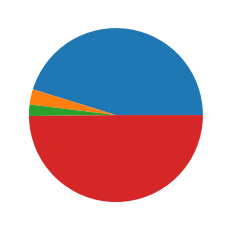

In [74]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(cf_test_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A PIE CHART
#BLUE - true positives RED - false negatives ORANGE - false positives GREEN - true negatives

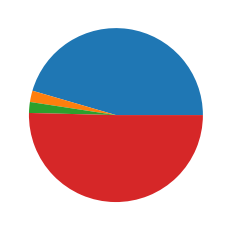

In [75]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(cf_train_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A PIE CHART

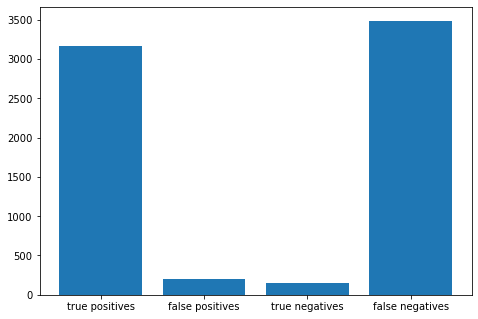

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,cf_test_list)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

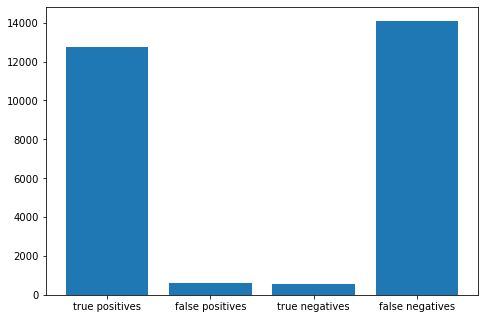

In [77]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,cf_train_list)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

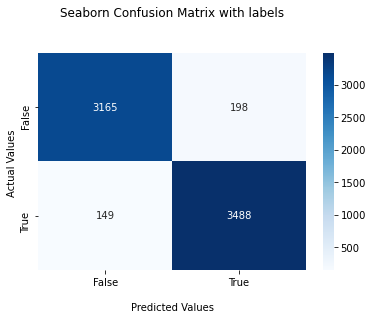

In [78]:
import seaborn as sns

ax = sns.heatmap(cf_test, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TEST DATA
#MNB

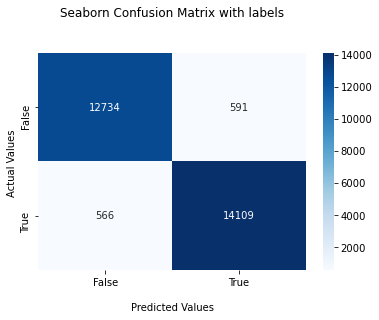

In [79]:
import seaborn as sns

ax = sns.heatmap(cf_train, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TRAINED DATA

In [80]:
accuracy_final = [acc_test,acc_train] #list of accuracy scores of test data and train data

In [81]:

#TRAIN DATA

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_label , y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.9585391423302255

In [82]:
#TEST DATA

from sklearn.metrics import roc_curve, auc
fpr, tpr, t = roc_curve(test_label , y_pred)
roc_auc = auc(fpr, tpr)
roc_auc



0.9500780829010588

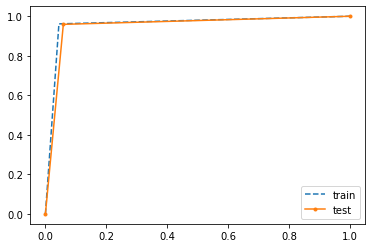

In [83]:
from matplotlib import pyplot

pyplot.plot(false_positive_rate, true_positive_rate, linestyle='--',label="train")
pyplot.plot(fpr, tpr, marker='.',label="test")

pyplot.xlabel('')
pyplot.ylabel('')

pyplot.legend()

pyplot.show()

#ANOTHER COMPARISON BETWEEN TEST ACCURACY AND TRAIN ACCURACY

In [84]:
#IMPORTING LOGISTIC REGRESSION 

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression()

In [87]:
model.fit(training_data, train_label)
y_pred  = model.predict(testing_data)

In [88]:
pd.Series(y_pred).value_counts()

1    3627
0    3373
dtype: int64

In [89]:
test_label.value_counts()

1    3637
0    3363
Name: label, dtype: int64

In [90]:
print(classification_report(test_label , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3363
           1       0.99      0.99      0.99      3637

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [91]:
y_pred_train = model.predict(training_data)
print(classification_report(train_label , y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13325
           1       0.99      0.99      0.99     14675

    accuracy                           0.99     28000
   macro avg       0.99      0.99      0.99     28000
weighted avg       0.99      0.99      0.99     28000



In [92]:
accuracy_score(train_label , y_pred_train)

0.9928571428571429

In [93]:
accuracy_score(test_label , y_pred)

0.9877142857142858

In [94]:
lr_acc = accuracy_score(test_label , y_pred)

In [95]:
lr_acc_train=accuracy_score(train_label , y_pred_train) #accuracy of trained data

In [96]:
lr_acc_test=accuracy_score(test_label , y_pred) #accuracy of test data

In [97]:
print(lr_acc_test,lr_acc_train) #printing the accuracy values

0.9877142857142858 0.9928571428571429


In [98]:
print(f'Accuracy of training data: {round(lr_acc_train*100,2)}%')
print(f'Accuracy of testing data: {round(lr_acc_test*100,2)}%')

Accuracy of training data: 99.29%
Accuracy of testing data: 98.77%


In [99]:
lr_cf_test=confusion_matrix(test_label , y_pred)

In [100]:
lr_cf_train = confusion_matrix(train_label , y_pred_train)

In [101]:
print(lr_cf_test)
print(lr_cf_train)

[[3325   38]
 [  48 3589]]
[[13247    78]
 [  122 14553]]


In [102]:
lis3 = lr_cf_test.tolist() #convert test array to list
lis4 = lr_cf_train.tolist() #convert train array to list

In [103]:
lr_cf_test_list=[lis3[0][0],lis3[0][1],lis3[1][0],lis3[1][1]]
lr_cf_train_list=[lis4[0][0],lis4[0][1],lis4[1][0],lis4[1][1]]

In [104]:
print(lr_cf_test_list)
print(lr_cf_train_list)

[3325, 38, 48, 3589]
[13247, 78, 122, 14553]


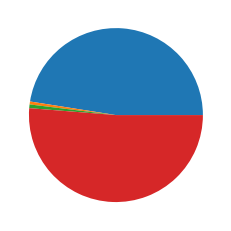

In [105]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(lr_cf_test_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A PIE CHART
#BLUE - true positives RED - false negatives ORANGE - false positives GREEN - true negatives

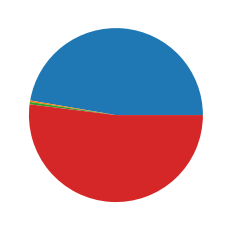

In [106]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(lr_cf_train_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A PIE CHART

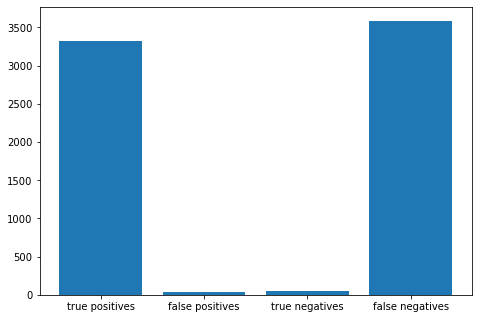

In [107]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,lr_cf_test_list)
plt.show()

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A BAR CHART

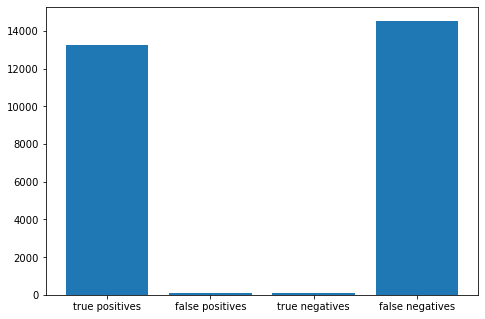

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,lr_cf_train_list)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

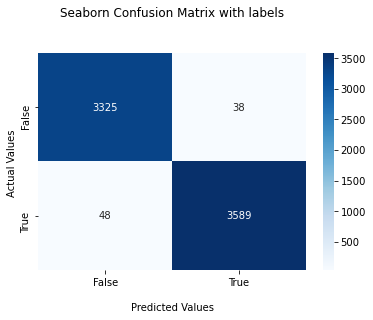

In [109]:
import seaborn as sns

ax = sns.heatmap(lr_cf_test, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TEST DATA
#LR

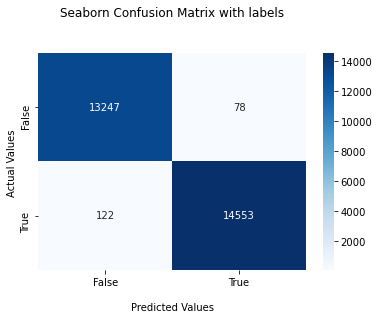

In [110]:
import seaborn as sns

ax = sns.heatmap(lr_cf_train, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TRAINED DATA

In [111]:
accuracy_final = [lr_acc_test,lr_acc_train] #list of accuracy scores of test data and train data

In [112]:
#TRAIN DATA

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_label , y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9929164416005318

In [113]:
#TEST DATA

from sklearn.metrics import roc_curve, auc
fpr, tpr, t = roc_curve(test_label , y_pred)
roc_auc = auc(fpr, tpr)
roc_auc



0.987751437283786

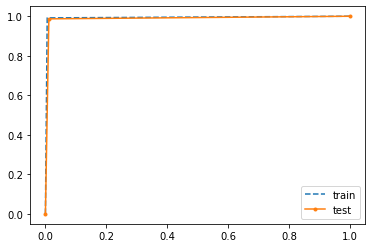

In [114]:
from matplotlib import pyplot

pyplot.plot(false_positive_rate, true_positive_rate, linestyle='--',label="train")
pyplot.plot(fpr, tpr, marker='.',label="test")

pyplot.xlabel('')
pyplot.ylabel('')

pyplot.legend()

pyplot.show()

#ANOTHER COMPARISON BETWEEN TEST ACCURACY AND TRAIN ACCURACY

#importing randomdecisionforest

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
DTC_MODEL = DecisionTreeClassifier()

In [117]:
DTC_MODEL.fit(training_data, train_label)
y_pred  = DTC_MODEL.predict(testing_data)

In [118]:
pd.Series(y_pred).value_counts()

1    3637
0    3363
dtype: int64

In [119]:
test_label.value_counts()

1    3637
0    3363
Name: label, dtype: int64

In [120]:
print(classification_report(test_label , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3363
           1       1.00      1.00      1.00      3637

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [121]:
y_pred_train = DTC_MODEL.predict(training_data)
print(classification_report(train_label , y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13325
           1       1.00      1.00      1.00     14675

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000



In [122]:
accuracy_score(train_label , y_pred_train)

0.9999642857142857

In [123]:
accuracy_score(test_label , y_pred)

0.996

In [124]:
DTC_acc = accuracy_score(test_label , y_pred)

In [125]:
DTC_acc

0.996

In [126]:
dtc_acc_train=accuracy_score(train_label , y_pred_train) #accuracy of trained data

In [127]:
dtc_acc_test=accuracy_score(test_label , y_pred) #accuracy of test data

In [128]:
print(dtc_acc_test,dtc_acc_train) #printing the accuracy values

0.996 0.9999642857142857


In [129]:
print(f'Accuracy of training data: {round(dtc_acc_train*100,2)}%')
print(f'Accuracy of testing data: {round(dtc_acc_test*100,2)}%')

Accuracy of training data: 100.0%
Accuracy of testing data: 99.6%


In [130]:
confusion_matrix(test_label , y_pred)

array([[3349,   14],
       [  14, 3623]], dtype=int64)

In [131]:
dtc_cf_test=confusion_matrix(test_label , y_pred)

In [132]:
confusion_matrix(train_label , y_pred_train)

array([[13324,     1],
       [    0, 14675]], dtype=int64)

In [133]:
dtc_cf_train = confusion_matrix(train_label , y_pred_train)

In [134]:
#predict if news is fake by providing str test string input

In [135]:
news = cleaning_data(str("Imposters posing as army personnel on the social media have been called out by the Indian Army as false news and disinformation."))

In [136]:
single_prediction = DTC_MODEL.predict(vectorizer.transform([news]).toarray())
single_prediction

array([1], dtype=int64)

In [137]:
print(dtc_cf_test)
print(dtc_cf_train)

[[3349   14]
 [  14 3623]]
[[13324     1]
 [    0 14675]]


In [138]:
lis5 = dtc_cf_test.tolist() #convert test array to list
lis6 = dtc_cf_train.tolist() #convert train array to list

In [139]:
dtc_cf_test_list=[lis5[0][0],lis5[0][1],lis5[1][0],lis5[1][1]]
dtc_cf_train_list=[lis6[0][0],lis6[0][1],lis6[1][0],lis6[1][1]]

In [140]:
print(dtc_cf_test_list)
print(dtc_cf_train_list)

[3349, 14, 14, 3623]
[13324, 1, 0, 14675]


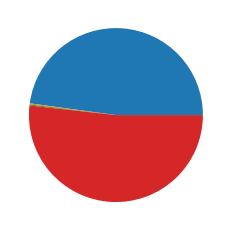

In [141]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(dtc_cf_test_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A PIE CHART
#BLUE - true positives RED - false negatives ORANGE - false positives GREEN - true negatives

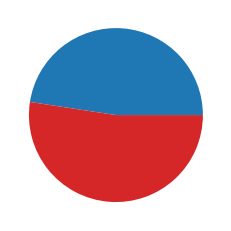

In [142]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(dtc_cf_train_list)


plt.pie(y)
plt.show() 

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A PIE CHART

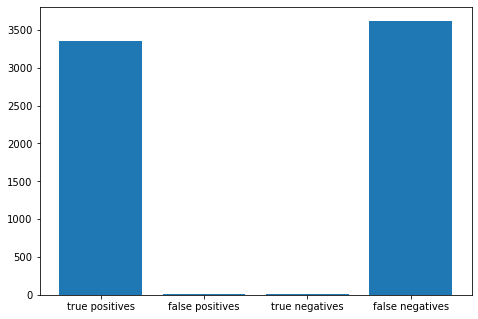

In [143]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,dtc_cf_test_list)
plt.show()

#PLOTTING THE TEST DATA CONFUSION MATRIX IN A BAR CHART

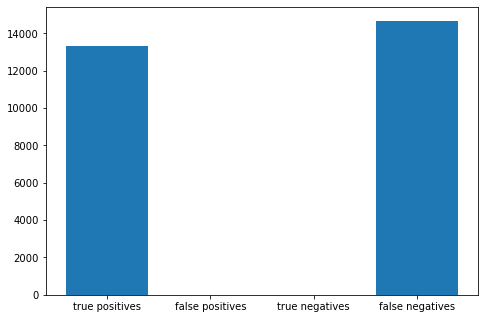

In [144]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['true positives','false positives','true negatives','false negatives']
ax.bar(title,dtc_cf_train_list)
plt.show()

#PLOTTING THE TRAIN DATA CONFUSION MATRIX IN A BAR CHART

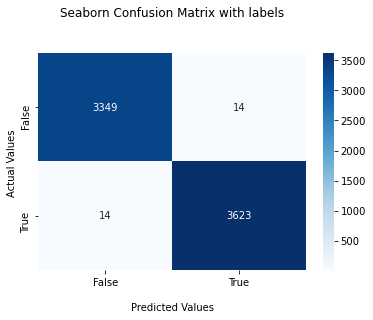

In [145]:
import seaborn as sns

ax = sns.heatmap(dtc_cf_test, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TEST DATA
#DTC

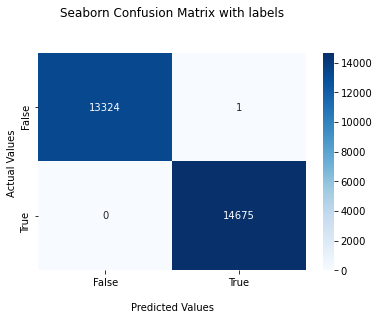

In [146]:
import seaborn as sns

ax = sns.heatmap(dtc_cf_train, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

#PLOTTING CONFUSION MATRIX DIAGRAM USING SEABORN TO ILLUSTRATE THE INFO ON TRAINED DATA

In [147]:
accuracy_final = [dtc_acc_test,dtc_acc_train] #list of accuracy scores of test data and train data

In [148]:
#TRAIN DATA

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_label , y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.9999624765478424

In [149]:
#TEST DATA

from sklearn.metrics import roc_curve, auc
fpr, tpr, t = roc_curve(test_label , y_pred)
roc_auc = auc(fpr, tpr)
roc_auc


0.9959938619424324

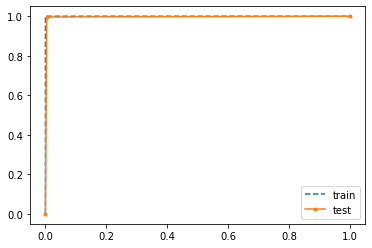

In [150]:
from matplotlib import pyplot

pyplot.plot(false_positive_rate, true_positive_rate, linestyle='--',label="train")
pyplot.plot(fpr, tpr, marker='.',label="test")

pyplot.xlabel('')
pyplot.ylabel('')

pyplot.legend()

pyplot.show()

#ANOTHER COMPARISON BETWEEN TEST ACCURACY AND TRAIN ACCURACY

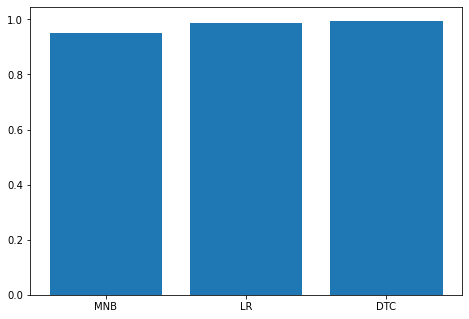

In [151]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['MNB','LR','DTC']
accuracy_final = [mnb_acc,lr_acc,DTC_acc]
ax.bar(title,accuracy_final)
plt.show()

#comparison graph of difference in accuracy between different classifiers

We can save our model to use it directly when required.

In [152]:
import joblib

In [153]:
joblib.dump(clf,'model.pkl')

['model.pkl']

In [154]:
model=joblib.load('model.pkl')


We will be implementing multiple classifiers and comparing their accuracies to find the most accurate one to tackle the huge spread of fake news acrosss social media channels.It is essential that such models are further advanced in order to effectively combat misinformation in these difficult times.
